In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR / "data"

print(CURRENT_DIR)
print(DATA_DIR)

/Users/fertorresmx/projects/cursos/realpython/gradebook_project
/Users/fertorresmx/projects/cursos/realpython/gradebook_project/data


## Load roster

In [4]:
pd.read_csv(DATA_DIR / "roster.csv")

,ID,Name,NetID,Email Address,Section
0,1234567,"Barrera Jr., Woody",WXB12345,WOODY.BARRERA_JR@UNIV.EDU,1
1,2345678,"Lambert, Malaika",MXL12345,MALAIKA.LAMBERT@UNIV.EDU,2
2,3456789,"Joyce, Traci",TXJ12345,TRACI.JOYCE@UNIV.EDU,1
3,4567890,"Flower, John Gregg",JGF12345,JOHN.G.2.FLOWER@UNIV.EDU,3
4,8406082,"Johnson, Stacy Michael",SMJ00936,STACY.JOHNSON@UNIV.EDU,2
...,...,...,...,...,...
145,5227994,"Johnson, Paul Mark",PMJ37756,PAUL.JOHNSON@UNIV.EDU,3
146,9804556,"Lee, Danielle Stephanie",DSL24347,DANIELLE.LEE@UNIV.EDU,3
147,1783442,"Edwards, Nicole",NXE44872,NICOLE.EDWARDS@UNIV.EDU,3
148,6345758,"Reyes, Bailey",BXR62103,BAILEY.REYES@UNIV.EDU,2


In [5]:
roster = pd.read_csv(
    DATA_DIR / "roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID"
)

In [6]:
roster.head(10)

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
rxs30280,richard.saunders@univ.edu,1
dma58910,daisy.anderson@univ.edu,2
hsw06874,holly.watson@univ.edu,2
bkr19538,brandy.reilly@univ.edu,2


## Load homework and exam grads data

In [7]:
pd.read_csv(DATA_DIR / "hw_exam_grades.csv").head(5)

,First Name,Last Name,SID,Homework 1,Homework 1 - Max Points,Homework 1 - Submission Time,Homework 2,Homework 2 - Max Points,Homework 2 - Submission Time,Homework 3,...,Homework 10 - Submission Time,Exam 1,Exam 1 - Max Points,Exam 1 - Submission Time,Exam 2,Exam 2 - Max Points,Exam 2 - Submission Time,Exam 3,Exam 3 - Max Points,Exam 3 - Submission Time
0,Aaron,Lester,axl60952,68.0,80,2019-08-29 08:56:02-07:00,74,80,2019-09-05 08:56:02-07:00,77,...,2019-10-31 08:56:02-07:00,79,100,2019-10-08 12:30:07-07:00,63,100,2019-11-08 12:30:07-07:00,68,100,2019-12-08 12:30:07-07:00
1,Adam,Cooper,amc28428,80.0,80,2019-08-29 08:56:02-07:00,78,80,2019-09-05 08:56:02-07:00,78,...,2019-10-31 08:56:02-07:00,65,100,2019-10-08 12:30:07-07:00,63,100,2019-11-08 12:30:07-07:00,90,100,2019-12-08 12:30:07-07:00
2,Alec,Curry,axc64717,69.0,80,2019-08-29 08:56:02-07:00,76,80,2019-09-05 08:56:02-07:00,66,...,2019-10-31 08:56:02-07:00,65,100,2019-10-08 12:30:07-07:00,78,100,2019-11-08 12:30:07-07:00,83,100,2019-12-08 12:30:07-07:00
3,Alexander,Rodriguez,akr14831,50.0,80,2019-08-29 08:56:02-07:00,54,80,2019-09-05 08:56:02-07:00,74,...,2019-10-31 08:56:02-07:00,97,100,2019-10-08 12:30:07-07:00,97,100,2019-11-08 12:30:07-07:00,81,100,2019-12-08 12:30:07-07:00
4,Amber,Daniels,axd11293,54.0,80,2019-08-29 08:56:02-07:00,57,80,2019-09-05 08:56:02-07:00,77,...,2019-10-31 08:56:02-07:00,68,100,2019-10-08 12:30:07-07:00,95,100,2019-11-08 12:30:07-07:00,88,100,2019-12-08 12:30:07-07:00


In [8]:
pd.read_csv(DATA_DIR / "hw_exam_grades.csv").columns

Index(['First Name', 'Last Name', 'SID', 'Homework 1',
       'Homework 1 - Max Points', 'Homework 1 - Submission Time', 'Homework 2',
       'Homework 2 - Max Points', 'Homework 2 - Submission Time', 'Homework 3',
       'Homework 3 - Max Points', 'Homework 3 - Submission Time', 'Homework 4',
       'Homework 4 - Max Points', 'Homework 4 - Submission Time', 'Homework 5',
       'Homework 5 - Max Points', 'Homework 5 - Submission Time', 'Homework 6',
       'Homework 6 - Max Points', 'Homework 6 - Submission Time', 'Homework 7',
       'Homework 7 - Max Points', 'Homework 7 - Submission Time', 'Homework 8',
       'Homework 8 - Max Points', 'Homework 8 - Submission Time', 'Homework 9',
       'Homework 9 - Max Points', 'Homework 9 - Submission Time',
       'Homework 10', 'Homework 10 - Max Points',
       'Homework 10 - Submission Time', 'Exam 1', 'Exam 1 - Max Points',
       'Exam 1 - Submission Time', 'Exam 2', 'Exam 2 - Max Points',
       'Exam 2 - Submission Time', 'Exam 3', 'Ex

In [9]:
pd.read_csv(
    DATA_DIR / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda title: "Submission" not in title,
    index_col="SID"
)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
txw75701,Travis,Washington,64.0,80,67,80,56,80,92,100,...,40,60,52,60,94,100,74,100,68,100
tbr17292,Troy,Raymond,50.0,80,59,80,79,80,98,100,...,45,60,49,60,91,100,67,100,100,100
vkb66346,Victoria,Boyd,58.0,80,61,80,75,80,99,100,...,40,60,50,60,68,100,93,100,69,100


In [10]:
hw_exam_grades = pd.read_csv(
    DATA_DIR / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda title: "Submission" not in title,
    index_col="SID"
)

In [11]:
hw_exam_grades.head(10)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
ara97741,Amy,Adams,49.0,80,53,80,55,80,78,100,...,39,60,54,60,87,100,74,100,76,100
alw07647,Amy,White,71.0,80,60,80,72,80,95,100,...,47,60,41,60,99,100,95,100,99,100
axd67070,Amy,Dunn,72.0,80,61,80,50,80,90,100,...,48,60,50,60,93,100,96,100,86,100
ajt73762,Amy,Terry,71.0,80,54,80,76,80,93,100,...,54,60,49,60,60,100,81,100,79,100


## Load quiz data (quiz_#_grades.csv)

In [12]:
pd.read_csv(DATA_DIR / "quiz_1_grades.csv")

,Last Name,First Name,Email,Grade
0,Bennett,Richard,richard.bennett@univ.edu,10
1,Parker,Timothy,timothy.parker@univ.edu,9
2,Reyes,Carol,carol.reyes@univ.edu,5
3,Powers,Brooke,brooke.powers@univ.edu,6
4,Taylor,Michael,michael.taylor@univ.edu,5
...,...,...,...,...
145,Perez,Jeffrey,jeffrey.perez@univ.edu,4
146,Dunlap,Angela,angela.dunlap@univ.edu,6
147,Elliott,Richard,richard.elliott@univ.edu,6
148,Nguyen,Donna,donna.nguyen@univ.edu,7


In [13]:
# Create a blank dataframe
quiz_grades = pd.DataFrame()

for file_path in DATA_DIR.glob("quiz_*_grades.csv"):
    print(file_path)

/Users/fertorresmx/projects/cursos/realpython/gradebook_project/data/quiz_5_grades.csv
/Users/fertorresmx/projects/cursos/realpython/gradebook_project/data/quiz_2_grades.csv
/Users/fertorresmx/projects/cursos/realpython/gradebook_project/data/quiz_4_grades.csv
/Users/fertorresmx/projects/cursos/realpython/gradebook_project/data/quiz_1_grades.csv
/Users/fertorresmx/projects/cursos/realpython/gradebook_project/data/quiz_3_grades.csv


In [14]:
pd.read_csv(DATA_DIR / "quiz_1_grades.csv").columns

Index(['Last Name', 'First Name', 'Email', 'Grade'], dtype='object')

In [15]:
# Create a blank dataframe
quiz_grades = pd.DataFrame()

for file_path in DATA_DIR.glob("quiz_*_grades.csv"):
    # print(file_path)
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"]
    )
    
    # Concat the dataframes
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [16]:
quiz_grades.head()

,Grade,Grade,Grade,Grade,Grade
Email,,,,,
rachel.dennis@univ.edu,11,6,6,7,7
courtney.wolf@univ.edu,9,15,7,10,9
aaron.lester@univ.edu,8,9,8,6,10
ashley.martin@univ.edu,11,7,13,5,8
jessica.garza@univ.edu,10,8,11,8,16


In [17]:
# Give a diferent name to columns

# Create a blank dataframe
quiz_grades = pd.DataFrame()

for file_path in DATA_DIR.glob("quiz_*_grades.csv"):

    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"]
    ).rename(columns={"Grade": quiz_name})
    
    # Concat the dataframes
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [18]:
quiz_grades.head()

,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
Email,,,,,
rachel.dennis@univ.edu,11,6,6,7,7
courtney.wolf@univ.edu,9,15,7,10,9
aaron.lester@univ.edu,8,9,8,6,10
ashley.martin@univ.edu,11,7,13,5,8
jessica.garza@univ.edu,10,8,11,8,16


## Merging Grade Dataframes

In [19]:
roster.head(2)

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2


In [20]:
hw_exam_grades.head(2)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100


In [21]:
# Merge with different index columns
pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,40,60,51,60,84,100,80,100,94,100
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,49,60,57,60,62,100,70,100,90,100
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,58,60,51,60,89,100,63,100,65,100
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,41,60,46,60,90,100,72,100,71,100


In [22]:
final_df = pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

In [23]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


### Merge with join (another method)

In [24]:
final_df = roster.join(hw_exam_grades)

In [25]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [26]:
quiz_grades.columns

Index(['Quiz 5', 'Quiz 2', 'Quiz 4', 'Quiz 1', 'Quiz 3'], dtype='object')

In [27]:
quiz_grades.index

Index(['rachel.dennis@univ.edu', 'courtney.wolf@univ.edu',
       'aaron.lester@univ.edu', 'ashley.martin@univ.edu',
       'jessica.garza@univ.edu', 'timothy.edwards@univ.edu',
       'malaika.lambert@univ.edu', 'ashlee.foster@univ.edu',
       'tamara.warren@univ.edu', 'travis.washington@univ.edu',
       ...
       'sherry.good@univ.edu', 'rhonda.rice@univ.edu',
       'samantha.smith@univ.edu', 'holly.watson@univ.edu',
       'alexander.rodriguez@univ.edu', 'brandy.reilly@univ.edu',
       'douglas.payne@univ.edu', 'tara.johnson@univ.edu',
       'michelle.lee@univ.edu', 'scott.cervantes@univ.edu'],
      dtype='object', name='Email', length=150)

In [28]:
# Merge with quiz_grades dataframe
final_df = pd.merge(final_df, quiz_grades, left_on="Email Address", right_index=True)

In [29]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,10,10,7,4,11
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,6,10,13,8,10
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,4,6,9,8,14
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,5,8,13,8,8
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,7,14,7,6,11


In [30]:
# Fill the NaN values
final_df = final_df.fillna(0)

In [31]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,10,10,7,4,11
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,6,10,13,8,10
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,4,6,9,8,14
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,5,8,13,8,8
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,7,14,7,6,11


## Calculating final grade

In [32]:
# Do this for each exam: final_df['Exam 1 Score'] = final_df['Exam 1'] / final_df['Exam 1 - Max Points']

n_exams = 3
for n in range(1, n_exams + 1):
    final_df[f"Exam {n} Score"] = final_df[f"Exam {n}"] / final_df[f"Exam {n} - Max Points"]
    

In [33]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,10,10,7,4,11,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,6,10,13,8,10,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,4,6,9,8,14,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,5,8,13,8,8,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,7,14,7,6,11,0.96,0.80,0.86


## Calculating the Homework Scores | Calculating Grades - homework

In [34]:
# View only some columns

[x for x in final_df.columns if 'Home' in x and 'Max' in x]

['Homework 1 - Max Points',
 'Homework 2 - Max Points',
 'Homework 3 - Max Points',
 'Homework 4 - Max Points',
 'Homework 5 - Max Points',
 'Homework 6 - Max Points',
 'Homework 7 - Max Points',
 'Homework 8 - Max Points',
 'Homework 9 - Max Points',
 'Homework 10 - Max Points']

In [35]:
final_df[[x for x in final_df.columns if 'Home' in x and 'Max' in x]]

,Homework 1 - Max Points,Homework 2 - Max Points,Homework 3 - Max Points,Homework 4 - Max Points,Homework 5 - Max Points,Homework 6 - Max Points,Homework 7 - Max Points,Homework 8 - Max Points,Homework 9 - Max Points,Homework 10 - Max Points
NetID,,,,,,,,,,
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60
...,...,...,...,...,...,...,...,...,...,...
pmj37756,80,80,80,100,70,90,50,70,60,60
dsl24347,80,80,80,100,70,90,50,70,60,60
nxe44872,80,80,80,100,70,90,50,70,60,60


In [36]:
hw_max_cols = [x for x in final_df.columns if 'Home' in x and 'Max' in x]
hw_cols = [x for x in final_df.columns if 'Home' in x and 'Max' not in x]

In [37]:
# Be sure that both set of columns came in the same order or use sorted

hw_max_cols = sorted([x for x in final_df.columns if 'Home' in x and 'Max' in x])
hw_cols = sorted([x for x in final_df.columns if 'Home' in x and 'Max' not in x])

In [38]:
hw_max_cols

['Homework 1 - Max Points',
 'Homework 10 - Max Points',
 'Homework 2 - Max Points',
 'Homework 3 - Max Points',
 'Homework 4 - Max Points',
 'Homework 5 - Max Points',
 'Homework 6 - Max Points',
 'Homework 7 - Max Points',
 'Homework 8 - Max Points',
 'Homework 9 - Max Points']

In [39]:
hw_cols

['Homework 1',
 'Homework 10',
 'Homework 2',
 'Homework 3',
 'Homework 4',
 'Homework 5',
 'Homework 6',
 'Homework 7',
 'Homework 8',
 'Homework 9']

In [40]:
#final_df.drop(columns='Homework Score', inplace=True)

In [41]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,10,10,7,4,11,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,6,10,13,8,10,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,4,6,9,8,14,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,5,8,13,8,8,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,7,14,7,6,11,0.96,0.80,0.86


In [42]:
final_df[hw_cols].sum(axis=1)

NetID
wxb12345    598.0
mxl12345    612.0
txj12345    581.0
jgf12345    570.0
smj00936    579.0
            ...  
pmj37756    544.0
dsl24347    609.0
nxe44872    621.0
bxr62103    577.0
jxw53347    556.0
Length: 150, dtype: float64

In [43]:
final_df[hw_cols].sum(axis=1) / final_df[hw_max_cols].sum(axis=1)

NetID
wxb12345    0.808108
mxl12345    0.827027
txj12345    0.785135
jgf12345    0.770270
smj00936    0.782432
              ...   
pmj37756    0.735135
dsl24347    0.822973
nxe44872    0.839189
bxr62103    0.779730
jxw53347    0.751351
Length: 150, dtype: float64

In [44]:
hw_score_by_total = final_df[hw_cols].sum(axis=1) / final_df[hw_max_cols].sum(axis=1)

In [45]:
hw_score_by_total

NetID
wxb12345    0.808108
mxl12345    0.827027
txj12345    0.785135
jgf12345    0.770270
smj00936    0.782432
              ...   
pmj37756    0.735135
dsl24347    0.822973
nxe44872    0.839189
bxr62103    0.779730
jxw53347    0.751351
Length: 150, dtype: float64

In [46]:
# Add the new column
final_df['HW by Total'] = hw_score_by_total

In [47]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,10,10,7,4,11,0.86,0.62,0.90,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,6,10,13,8,10,0.60,0.91,0.93,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,4,6,9,8,14,1.00,0.84,0.64,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,5,8,13,8,8,0.72,0.83,0.77,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,7,14,7,6,11,0.96,0.80,0.86,0.782432


In [48]:
# This give us an error...
final_df[hw_cols] / final_df[hw_max_cols]

,Homework 1,Homework 1 - Max Points,Homework 10,Homework 10 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,Homework 5,Homework 5 - Max Points,Homework 6,Homework 6 - Max Points,Homework 7,Homework 7 - Max Points,Homework 8,Homework 8 - Max Points,Homework 9,Homework 9 - Max Points
NetID,,,,,,,,,,,,,,,,,,,,
wxb12345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mxl12345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txj12345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jgf12345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smj00936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dsl24347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nxe44872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# ...so, we tried whit this:
final_df[hw_cols] / final_df[hw_max_cols].set_axis(hw_cols, axis= 1)

,Homework 1,Homework 10,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9
NetID,,,,,,,,,,
wxb12345,0.6875,0.766667,0.7750,0.9125,0.83,0.971429,0.966667,0.72,0.614286,0.750000
mxl12345,0.7875,0.616667,0.7125,0.9750,0.83,0.871429,0.977778,0.84,0.828571,0.750000
txj12345,0.0000,0.883333,0.9625,0.7250,0.91,0.942857,0.866667,0.60,0.985714,0.983333
jgf12345,0.8625,0.666667,0.6500,0.8000,0.75,0.871429,0.922222,0.82,0.614286,0.700000
smj00936,0.9250,0.800000,0.6875,0.7500,0.67,0.657143,0.944444,0.86,0.600000,0.983333
...,...,...,...,...,...,...,...,...,...,...
pmj37756,0.9125,0.850000,0.6250,0.6875,0.65,0.671429,0.844444,0.64,0.785714,0.666667
dsl24347,0.8625,0.950000,0.6375,0.8750,0.96,0.728571,0.855556,0.74,0.742857,0.816667
nxe44872,0.7750,0.850000,0.9500,0.7750,0.79,0.914286,0.822222,0.74,0.828571,0.966667


In [50]:
final_df[hw_max_cols].set_axis(hw_cols, axis=1)

,Homework 1,Homework 10,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9
NetID,,,,,,,,,,
wxb12345,80,60,80,80,100,70,90,50,70,60
mxl12345,80,60,80,80,100,70,90,50,70,60
txj12345,80,60,80,80,100,70,90,50,70,60
jgf12345,80,60,80,80,100,70,90,50,70,60
smj00936,80,60,80,80,100,70,90,50,70,60
...,...,...,...,...,...,...,...,...,...,...
pmj37756,80,60,80,80,100,70,90,50,70,60
dsl24347,80,60,80,80,100,70,90,50,70,60
nxe44872,80,60,80,80,100,70,90,50,70,60


In [51]:
hw_max_data = final_df[hw_max_cols].set_axis(hw_cols, axis=1)

In [52]:
hw_max_data

,Homework 1,Homework 10,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9
NetID,,,,,,,,,,
wxb12345,80,60,80,80,100,70,90,50,70,60
mxl12345,80,60,80,80,100,70,90,50,70,60
txj12345,80,60,80,80,100,70,90,50,70,60
jgf12345,80,60,80,80,100,70,90,50,70,60
smj00936,80,60,80,80,100,70,90,50,70,60
...,...,...,...,...,...,...,...,...,...,...
pmj37756,80,60,80,80,100,70,90,50,70,60
dsl24347,80,60,80,80,100,70,90,50,70,60
nxe44872,80,60,80,80,100,70,90,50,70,60


In [53]:
hw_score_by_avg = (final_df[hw_cols] / hw_max_data).sum(axis=1) / len(hw_cols)

In [54]:
hw_score_by_avg

NetID
wxb12345    0.799405
mxl12345    0.818944
txj12345    0.785940
jgf12345    0.765710
smj00936    0.787742
              ...   
pmj37756    0.733325
dsl24347    0.816865
nxe44872    0.841175
bxr62103    0.773690
jxw53347    0.745171
Length: 150, dtype: float64

In [55]:
# Finally

final_df['HW by Average'] = hw_score_by_avg

In [56]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,10,7,4,11,0.86,0.62,0.90,0.808108,0.799405
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,6,10,13,8,10,0.60,0.91,0.93,0.827027,0.818944
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,4,6,9,8,14,1.00,0.84,0.64,0.785135,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,5,8,13,8,8,0.72,0.83,0.77,0.770270,0.765710
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,7,14,7,6,11,0.96,0.80,0.86,0.782432,0.787742


In [57]:
final_df[['HW by Total', 'HW by Average']]

,HW by Total,HW by Average
NetID,,
wxb12345,0.808108,0.799405
mxl12345,0.827027,0.818944
txj12345,0.785135,0.785940
jgf12345,0.770270,0.765710
smj00936,0.782432,0.787742
...,...,...
pmj37756,0.735135,0.733325
dsl24347,0.822973,0.816865
nxe44872,0.839189,0.841175


In [58]:
final_df['Homework Score'] = final_df[['HW by Total', 'HW by Average']].max(axis=1)

In [59]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,7,4,11,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,8,10,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,9,8,14,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,8,8,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,7,6,11,0.96,0.80,0.86,0.782432,0.787742,0.787742


### Calculating the Quiz and Exam Scores

In [60]:
final_df.filter(regex=r"^Quiz \d$", axis=1)

,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
NetID,,,,,
wxb12345,10,10,7,4,11
mxl12345,6,10,13,8,10
txj12345,4,6,9,8,14
jgf12345,5,8,13,8,8
smj00936,7,14,7,6,11
...,...,...,...,...,...
pmj37756,10,14,11,10,9
dsl24347,7,14,5,7,10
nxe44872,10,12,12,10,9


In [61]:
quiz_scores = final_df.filter(regex=r"^Quiz \d$", axis=1)

In [62]:
quiz_scores

,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
NetID,,,,,
wxb12345,10,10,7,4,11
mxl12345,6,10,13,8,10
txj12345,4,6,9,8,14
jgf12345,5,8,13,8,8
smj00936,7,14,7,6,11
...,...,...,...,...,...
pmj37756,10,14,11,10,9
dsl24347,7,14,5,7,10
nxe44872,10,12,12,10,9


In [63]:
quiz_scores.shape

(150, 5)

In [64]:
n_quiz = quiz_scores.shape[1]

In [65]:
n_quiz

5

In [66]:
quiz_max_points = pd.Series(
    {'Quiz 5': 12, 'Quiz 2': 15, 'Quiz 4':14, 'Quiz 1':11, 'Quiz 3':17}
)

In [67]:
quiz_max_points

Quiz 5    12
Quiz 2    15
Quiz 4    14
Quiz 1    11
Quiz 3    17
dtype: int64

In [68]:
quiz_score_by_total = quiz_scores.sum(axis=1) / quiz_max_points.sum()

In [69]:
quiz_score_by_total

NetID
wxb12345    0.608696
mxl12345    0.681159
txj12345    0.594203
jgf12345    0.608696
smj00936    0.652174
              ...   
pmj37756    0.782609
dsl24347    0.623188
nxe44872    0.768116
bxr62103    0.797101
jxw53347    0.637681
Length: 150, dtype: float64

In [70]:
quiz_score_by_avg = (quiz_scores / quiz_max_points).sum(axis=1) / n_quiz

In [71]:
quiz_score_by_avg

NetID
wxb12345    0.602139
mxl12345    0.682149
txj12345    0.585399
jgf12345    0.615286
smj00936    0.641836
              ...   
pmj37756    0.798177
dsl24347    0.619682
nxe44872    0.785796
bxr62103    0.784199
jxw53347    0.667701
Length: 150, dtype: float64

In [72]:
pd.concat([quiz_score_by_total, quiz_score_by_avg], axis=1).max(axis=1)

NetID
wxb12345    0.608696
mxl12345    0.682149
txj12345    0.594203
jgf12345    0.615286
smj00936    0.652174
              ...   
pmj37756    0.798177
dsl24347    0.623188
nxe44872    0.785796
bxr62103    0.797101
jxw53347    0.667701
Length: 150, dtype: float64

In [73]:
# final_df.drop(columns='Quiz Score', inplace=True)

In [74]:
final_df['Quiz Score'] = pd.concat([quiz_score_by_total, quiz_score_by_avg], axis=1).max(axis=1)


In [75]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,7,4,11,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,13,8,10,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,9,8,14,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,13,8,8,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,7,6,11,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174


## Grouping the Data to Calculate Final Scores


In [76]:
weights = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.10,
        "Exam 3 Score": 0.15,
        "Quiz Score":   0.30,
        "Homework Score": 0.40,
    }
)

In [77]:
weights.index

Index(['Exam 1 Score', 'Exam 2 Score', 'Exam 3 Score', 'Quiz Score',
       'Homework Score'],
      dtype='object')

In [78]:
final_df[weights.index]

,Exam 1 Score,Exam 2 Score,Exam 3 Score,Quiz Score,Homework Score
NetID,,,,,
wxb12345,0.86,0.62,0.90,0.608696,0.808108
mxl12345,0.60,0.91,0.93,0.682149,0.827027
txj12345,1.00,0.84,0.64,0.594203,0.785940
jgf12345,0.72,0.83,0.77,0.615286,0.770270
smj00936,0.96,0.80,0.86,0.652174,0.787742
...,...,...,...,...,...
pmj37756,0.84,0.80,0.94,0.798177,0.735135
dsl24347,0.62,0.70,0.90,0.623188,0.822973
nxe44872,0.89,0.63,0.65,0.785796,0.841175


In [79]:
final_df[weights.index] * weights

,Exam 1 Score,Exam 2 Score,Exam 3 Score,Quiz Score,Homework Score
NetID,,,,,
wxb12345,0.0430,0.062,0.1350,0.182609,0.323243
mxl12345,0.0300,0.091,0.1395,0.204645,0.330811
txj12345,0.0500,0.084,0.0960,0.178261,0.314376
jgf12345,0.0360,0.083,0.1155,0.184586,0.308108
smj00936,0.0480,0.080,0.1290,0.195652,0.315097
...,...,...,...,...,...
pmj37756,0.0420,0.080,0.1410,0.239453,0.294054
dsl24347,0.0310,0.070,0.1350,0.186957,0.329189
nxe44872,0.0445,0.063,0.0975,0.235739,0.336470


In [80]:
(final_df[weights.index] * weights).sum(axis=1)

NetID
wxb12345    0.745852
mxl12345    0.795956
txj12345    0.722637
jgf12345    0.727194
smj00936    0.767749
              ...   
pmj37756    0.796507
dsl24347    0.752146
nxe44872    0.777209
bxr62103    0.774522
jxw53347    0.744851
Length: 150, dtype: float64

In [81]:
final_df['Final Score'] = (final_df[weights.index] * weights).sum(axis=1)

In [82]:
final_df

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score,Final Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,4,11,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.745852
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,8,10,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.682149,0.795956
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,8,14,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.722637
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.615286,0.727194
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,6,11,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.767749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,10,9,0.84,0.80,0.94,0.735135,0.733325,0.735135,0.798177,0.796507
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,7,10,0.62,0.70,0.90,0.822973,0.816865,0.822973,0.623188,0.752146
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,10,9,0.89,0.63,0.65,0.839189,0.841175,0.841175,0.785796,0.777209


In [83]:
np.ceil(final_df['Final Score'] * 100)

NetID
wxb12345    75.0
mxl12345    80.0
txj12345    73.0
jgf12345    73.0
smj00936    77.0
            ... 
pmj37756    80.0
dsl24347    76.0
nxe44872    78.0
bxr62103    78.0
jxw53347    75.0
Name: Final Score, Length: 150, dtype: float64

In [84]:
final_df['Ceiling Score'] = np.ceil(final_df['Final Score'] * 100)

In [85]:
final_df

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score,Final Score,Ceiling Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.745852,75.0
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.682149,0.795956,80.0
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.722637,73.0
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.615286,0.727194,73.0
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.767749,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,9,0.84,0.80,0.94,0.735135,0.733325,0.735135,0.798177,0.796507,80.0
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,10,0.62,0.70,0.90,0.822973,0.816865,0.822973,0.623188,0.752146,76.0
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,9,0.89,0.63,0.65,0.839189,0.841175,0.841175,0.785796,0.777209,78.0


In [86]:
def get_letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'
    

In [87]:
final_df['Ceiling Score'].map(get_letter_grade)

NetID
wxb12345    C
mxl12345    B
txj12345    C
jgf12345    C
smj00936    C
           ..
pmj37756    B
dsl24347    C
nxe44872    C
bxr62103    C
jxw53347    C
Name: Ceiling Score, Length: 150, dtype: object

In [88]:
letter_grades = final_df['Ceiling Score'].map(get_letter_grade)

In [89]:
final_df['Final Grade'] = pd.Categorical(
    letter_grades, categories=['F', 'D', 'C', 'B', 'A'], ordered=True
)

In [90]:
final_df['Final Grade']

NetID
wxb12345    C
mxl12345    B
txj12345    C
jgf12345    C
smj00936    C
           ..
pmj37756    B
dsl24347    C
nxe44872    C
bxr62103    C
jxw53347    C
Name: Final Grade, Length: 150, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

## Writing the Data to CSV files

In [91]:
cols_to_write = ["Last Name", "First Name", "Email Address", "Ceiling Score"]

In [92]:
final_df[final_df.Section == 1]

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score,Final Score,Ceiling Score,Final Grade
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.745852,75.0,C
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.722637,73.0,C
rxs30280,richard.saunders@univ.edu,1,Richard,Saunders,53.0,80,56,80,48,80,...,0.65,0.93,0.64,0.710811,0.708837,0.710811,0.836384,0.756740,76.0,C
edh14938,emily.houston@univ.edu,1,Emily,Houston,54.0,80,60,80,56,80,...,1.00,0.78,0.87,0.758108,0.766294,0.766294,0.724638,0.782409,79.0,C
rjb91830,richard.bennett@univ.edu,1,Richard,Bennett,76.0,80,75,80,77,80,...,0.66,0.97,0.88,0.829730,0.827508,0.829730,0.648653,0.788488,79.0,C
bdp78944,brooke.powers@univ.edu,1,Brooke,Powers,80.0,80,60,80,53,80,...,0.77,0.87,0.90,0.797297,0.802885,0.802885,0.739130,0.803393,81.0,B
jty40106,joseph.young@univ.edu,1,Joseph,Young,51.0,80,69,80,60,80,...,0.72,0.68,0.96,0.774324,0.790048,0.790048,0.797107,0.803151,81.0,B
cxg21963,cynthia.guzman@univ.edu,1,Cynthia,Guzman,63.0,80,68,80,48,80,...,0.64,0.74,0.66,0.740541,0.751512,0.751512,0.753623,0.731692,74.0,C
tsw14969,tamara.warren@univ.edu,1,Tamara,Warren,74.0,80,53,80,48,80,...,0.77,0.80,0.99,0.794595,0.801766,0.801766,0.840580,0.839880,84.0,B


In [93]:
final_df[final_df.Section == 1][cols_to_write]

,Last Name,First Name,Email Address,Ceiling Score
NetID,,,,
wxb12345,Barrera,Woody,woody.barrera_jr@univ.edu,75.0
txj12345,Joyce,Traci,traci.joyce@univ.edu,73.0
rxs30280,Saunders,Richard,richard.saunders@univ.edu,76.0
edh14938,Houston,Emily,emily.houston@univ.edu,79.0
rjb91830,Bennett,Richard,richard.bennett@univ.edu,79.0
bdp78944,Powers,Brooke,brooke.powers@univ.edu,81.0
jty40106,Young,Joseph,joseph.young@univ.edu,81.0
cxg21963,Guzman,Cynthia,cynthia.guzman@univ.edu,74.0
tsw14969,Warren,Tamara,tamara.warren@univ.edu,84.0


### Using group by function

In [94]:
g = final_df.groupby("Section")

In [95]:
g

In [96]:
g.groups

{1: ['wxb12345', 'txj12345', 'rxs30280', 'edh14938', 'rjb91830', 'bdp78944', 'jty40106', 'cxg21963', 'tsw14969', 'jlh15029', 'msl77920', 'thh29195', 'jxm83777', 'txt65366', 'cxd92501', 'kxf45205', 'bxs54690', 'djb29817', 'sgm04582', 'bms82804', 'mxj54725', 'jxw98212', 'jmp63760', 'sxw76890', 'rge65208', 'dxp49123', 'pmk49230', 'sxv18182', 'rkr43763', 'ksp17362', 'txw75701', 'sxt33634', 'txp55047', 'jxb40799', 'tmo55387', 'mjp68159', 'kam90876', 'dcj14616', 'ara97741', 'jag55224', 'eed42850', 'cxh80084', 'lxb98047', 'mxl67812', 'exd72538', 'mxs33416', 'txf41578', 'jxu45537', 'kxs29884', 'bch39598', 'axw80146', 'mjg41514', 'dxn21936', 'cxa22039', 'nxm87406', 'jxw53347'], 2: ['mxl12345', 'smj00936', 'dma58910', 'hsw06874', 'bkr19538', 'lxc64780', 'rxd29805', 'sem28474', 'bjg14618', 'hxg56446', 'sbr74322', 'skr62062', 'djd31335', 'smg03171', 'ksb85997', 'wad63934', 'amc28428', 'lmb95641', 'aes07091', 'dsg54218', 'asm59771', 'lba53221', 'kxw26270', 'axd11293', 'jxw87000', 'axc64717', 'tce09

In [97]:
g.get_group(1)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score,Final Score,Ceiling Score,Final Grade
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.745852,75.0,C
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.722637,73.0,C
rxs30280,richard.saunders@univ.edu,1,Richard,Saunders,53.0,80,56,80,48,80,...,0.65,0.93,0.64,0.710811,0.708837,0.710811,0.836384,0.756740,76.0,C
edh14938,emily.houston@univ.edu,1,Emily,Houston,54.0,80,60,80,56,80,...,1.00,0.78,0.87,0.758108,0.766294,0.766294,0.724638,0.782409,79.0,C
rjb91830,richard.bennett@univ.edu,1,Richard,Bennett,76.0,80,75,80,77,80,...,0.66,0.97,0.88,0.829730,0.827508,0.829730,0.648653,0.788488,79.0,C
bdp78944,brooke.powers@univ.edu,1,Brooke,Powers,80.0,80,60,80,53,80,...,0.77,0.87,0.90,0.797297,0.802885,0.802885,0.739130,0.803393,81.0,B
jty40106,joseph.young@univ.edu,1,Joseph,Young,51.0,80,69,80,60,80,...,0.72,0.68,0.96,0.774324,0.790048,0.790048,0.797107,0.803151,81.0,B
cxg21963,cynthia.guzman@univ.edu,1,Cynthia,Guzman,63.0,80,68,80,48,80,...,0.64,0.74,0.66,0.740541,0.751512,0.751512,0.753623,0.731692,74.0,C
tsw14969,tamara.warren@univ.edu,1,Tamara,Warren,74.0,80,53,80,48,80,...,0.77,0.80,0.99,0.794595,0.801766,0.801766,0.840580,0.839880,84.0,B


In [98]:
# We can iterate over a group by object
# final_df.groupby("Section") THIS create a generator
for section, df in final_df.groupby("Section"):
    section_file = DATA_DIR / f"section_{section}_grades.csv"
    df[cols_to_write].sort_values(by=["Last Name", "First Name"]).to_csv(section_file)
    

In [99]:
pd.read_csv(DATA_DIR / "section_1_grades.csv")

,NetID,Last Name,First Name,Email Address,Ceiling Score
0,ara97741,Adams,Amy,amy.adams@univ.edu,75.0
1,cxa22039,Allen,Christina,christina.allen@univ.edu,79.0
2,lxb98047,Baldwin,Lucas,lucas.baldwin@univ.edu,83.0
3,wxb12345,Barrera,Woody,woody.barrera_jr@univ.edu,75.0
4,jxb40799,Bauer,John,john.bauer@univ.edu,78.0
5,djb29817,Beck,David,david.beck@univ.edu,68.0
6,rjb91830,Bennett,Richard,richard.bennett@univ.edu,79.0
7,cxd92501,Dennis,Cameron,cameron.dennis@univ.edu,67.0
8,eed42850,Dudley,Emily,emily.dudley@univ.edu,74.0
9,exd72538,Duffy,Erin,erin.duffy@univ.edu,79.0


## Ploting and analyzing the data

In [101]:
final_df['Final Grade'].value_counts()

Final Grade
C    102
B     42
D      6
F      0
A      0
Name: count, dtype: int64

In [102]:
final_df['Final Grade'].value_counts().sort_index()

Final Grade
F      0
D      6
C    102
B     42
A      0
Name: count, dtype: int64

In [103]:
grade_counts = final_df['Final Grade'].value_counts().sort_index()

In [104]:
grade_counts

Final Grade
F      0
D      6
C    102
B     42
A      0
Name: count, dtype: int64

<Axes: xlabel='Final Grade'>

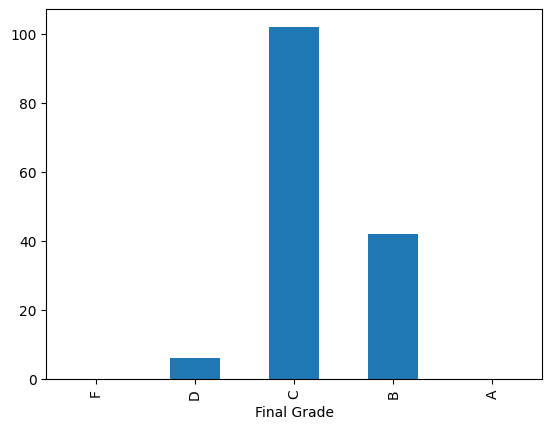

In [105]:
grade_counts.plot.bar()

<Axes: ylabel='Frequency'>

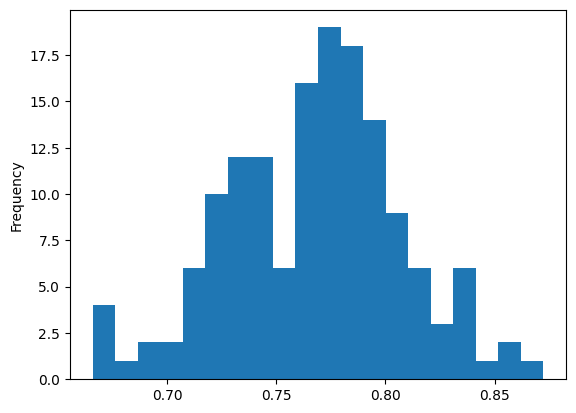

In [107]:
final_df['Final Score'].plot.hist(bins=20, label='Grade Distribution')

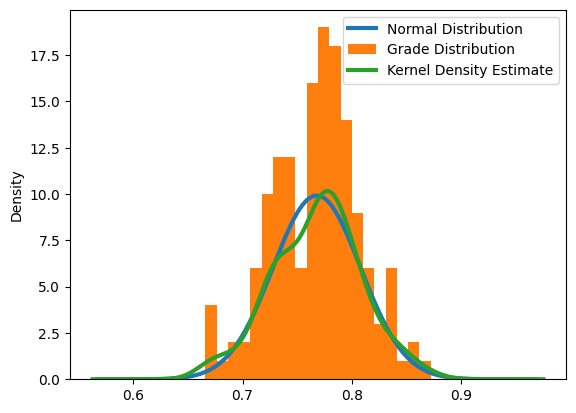

In [111]:
grade_mean = final_df['Final Score'].mean()
grade_std = final_df['Final Score'].std()

import scipy.stats
import matplotlib.pyplot as plt

x = np.linspace(grade_mean - 5*grade_std, grade_mean + 5*grade_std, 200)
y = scipy.stats.norm.pdf(x, loc=grade_mean, scale=grade_std)

plt.plot(x, y, label='Normal Distribution', linewidth=3)

final_df['Final Score'].plot.hist(bins=20, label='Grade Distribution')

final_df['Final Score'].plot.density(
    linewidth=3, label='Kernel Density Estimate')

plt.legend()